# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zambezi
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | saint-louis
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | shimoda
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | alihe
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | vychegodskiy
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 4 | kununurra
Processing Record 39 of Set 4 | ronne
Processing Record 40 of Set 4 | gurun
Processing Record 41 of Set 4 | penzance
Processing Record 42 of Set 4 | varna
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | burns lake
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | masumbwe
Processing Record 0 of Set 5 | nambucca heads
Processing Record 1 of Set 5 | mantua
Processing Record 2 of Set 5 | suntar
Processing Record 3 of Set 5 | cazaje
City not found. Skipping...
Processing Record 4 of Set 5 | bandar-e anzali
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | naberera
Processing Record 7 of Set 5 | puerto escondido
Processing Record 8 of Set 5 | toliary
City not found. Skipping...
Proces

Processing Record 27 of Set 8 | solsvik
City not found. Skipping...
Processing Record 28 of Set 8 | ahipara
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | luquillo
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | green valley
Processing Record 33 of Set 8 | thanh hoa
Processing Record 34 of Set 8 | jieshi
Processing Record 35 of Set 8 | kayerkan
Processing Record 36 of Set 8 | akyab
Processing Record 37 of Set 8 | adrar
Processing Record 38 of Set 8 | saint-augustin
Processing Record 39 of Set 8 | san rafael
Processing Record 40 of Set 8 | grand centre
City not found. Skipping...
Processing Record 41 of Set 8 | wundanyi
Processing Record 42 of Set 8 | nam tha
City not found. Skipping...
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | mahibadhoo
Processing Record 45 of Set 8 | pont-a-mousson
Processing Record 46 of Set 8 | almaznyy
Processing Record 47 of Set 8 | pakokku
Processing Record 48 of Set 8 | mayumba
Pro

Processing Record 17 of Set 12 | shar
Processing Record 18 of Set 12 | alexandria
Processing Record 19 of Set 12 | serafimovskiy
Processing Record 20 of Set 12 | manali
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | mocuba
Processing Record 24 of Set 12 | xinzhou
Processing Record 25 of Set 12 | hirosaki
Processing Record 26 of Set 12 | timmins
Processing Record 27 of Set 12 | katakwi
Processing Record 28 of Set 12 | igarka
Processing Record 29 of Set 12 | el sauzal
Processing Record 30 of Set 12 | manaus
Processing Record 31 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 32 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 33 of Set 12 | lerwick
Processing Record 34 of Set 12 | vagur
Processing Record 35 of Set 12 | arriana
Processing Record 36 of Set 12 | mogadishu
Processing Record 37 of Set 12 | isla del bosque
Processing Record 38 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count

<bound method DataFrame.count of             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        zambezi -13.5432   23.1047    292.52        95         100   
1         padang  -0.9492  100.3543    297.18        85         100   
2    saint-louis  16.3333  -15.0000    299.21         9          99   
3    grand gaube -20.0064   57.6608    300.03        77          99   
4      mahebourg -20.4081   57.7000    299.96        89          40   
..           ...      ...       ...       ...       ...         ...   
563    nadvoitsy  63.8667   34.3167    253.23       100          72   
564     ust-maya  60.4167  134.5333    238.59       100          99   
565   soligalich  59.0778   42.2864    268.54        97         100   
566      hualmay -11.0964  -77.6139    298.43        69          81   
567        aswan  24.0934   32.9070    290.76        23           0   

     Wind Speed Country        Date  
0          2.60      ZM  1675537664  
1          1.28      ID  1675537446  


In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zambezi,-13.5432,23.1047,292.52,95,100,2.60,ZM,1675537664
1,padang,-0.9492,100.3543,297.18,85,100,1.28,ID,1675537446
2,saint-louis,16.3333,-15.0000,299.21,9,99,4.97,SN,1675537461
3,grand gaube,-20.0064,57.6608,300.03,77,99,2.24,MU,1675537664
4,mahebourg,-20.4081,57.7000,299.96,89,40,3.60,MU,1675537306
...,...,...,...,...,...,...,...,...,...
563,nadvoitsy,63.8667,34.3167,253.23,100,72,1.38,RU,1675537810
564,ust-maya,60.4167,134.5333,238.59,100,99,0.54,RU,1675537811
565,soligalich,59.0778,42.2864,268.54,97,100,1.87,RU,1675537811
566,hualmay,-11.0964,-77.6139,298.43,69,81,4.11,PE,1675537536


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zambezi,-13.5432,23.1047,292.52,95,100,2.60,ZM,1675537664
1,padang,-0.9492,100.3543,297.18,85,100,1.28,ID,1675537446
2,saint-louis,16.3333,-15.0000,299.21,9,99,4.97,SN,1675537461
3,grand gaube,-20.0064,57.6608,300.03,77,99,2.24,MU,1675537664
4,mahebourg,-20.4081,57.7000,299.96,89,40,3.60,MU,1675537306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-value is: 0.6008520706945272
y = -0.43x + 291.71


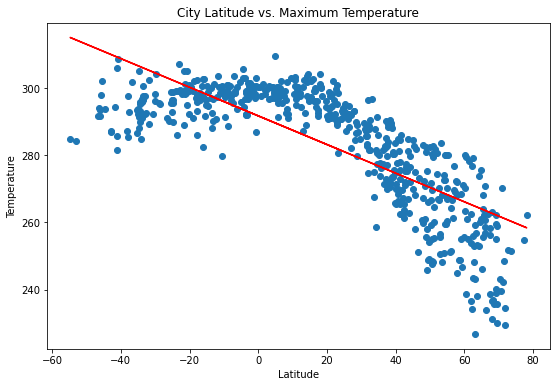

In [33]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-value is: 0.015117454894577024
y = 0.08x + 70.28


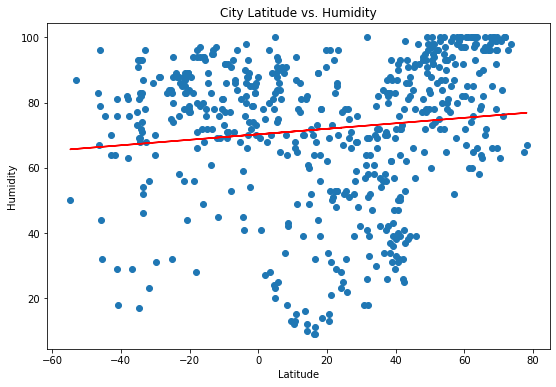

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-value is: 0.018811411041530664
y = 0.18x + 55.97


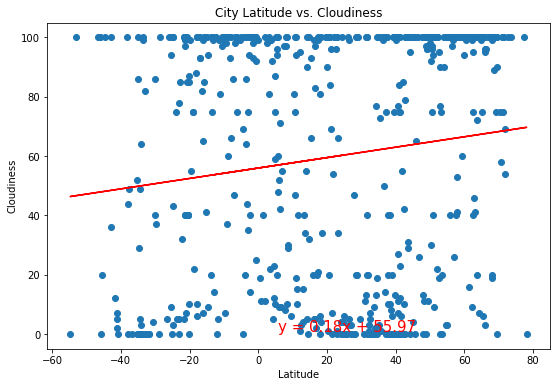

In [35]:
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-value is: 2.4651837300577865e-06
y = 0.0x + 3.43


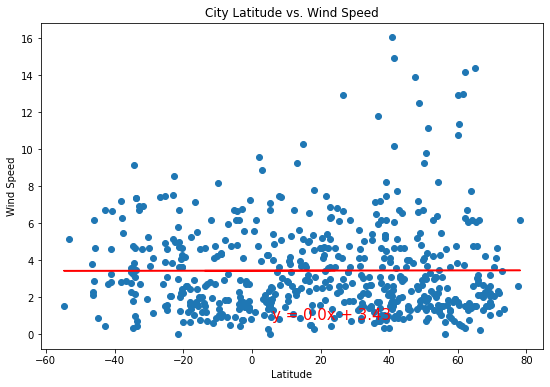

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
linear_regression = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint-louis,16.3333,-15.0000,299.21,9,99,4.97,SN,1675537461
5,tasiilaq,65.6145,-37.6368,268.24,90,100,4.75,GL,1675537308
6,dingle,10.9995,122.6711,296.67,94,100,4.19,PH,1675537428
8,albany,42.6001,-73.9662,261.42,41,42,0.89,US,1675537191
11,shimoda,34.6667,138.9500,280.59,66,19,2.66,JP,1675537389


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]  0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zambezi,-13.5432,23.1047,292.52,95,100,2.60,ZM,1675537664
1,padang,-0.9492,100.3543,297.18,85,100,1.28,ID,1675537446
3,grand gaube,-20.0064,57.6608,300.03,77,99,2.24,MU,1675537664
4,mahebourg,-20.4081,57.7000,299.96,89,40,3.60,MU,1675537306
7,vaini,-21.2000,-175.2000,299.24,89,40,3.60,TO,1675537287


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7541066631947966
y = -0.94x + 297.95


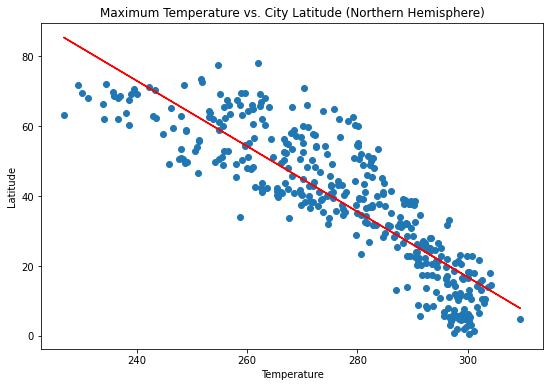

In [39]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.11162946694979202
y = 0.85x + -271.1


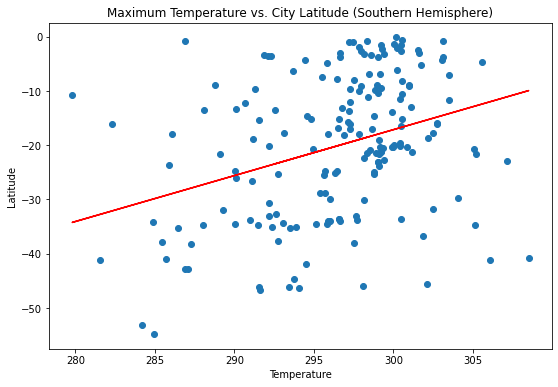

In [40]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1900224689889881
y = 0.36x + 13.05


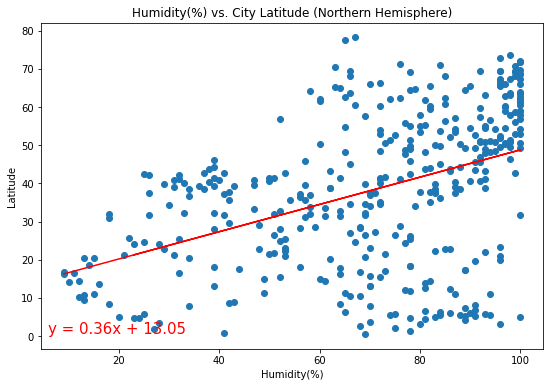

In [45]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Humidity"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.057999335284371886
y = 0.19x + -34.59


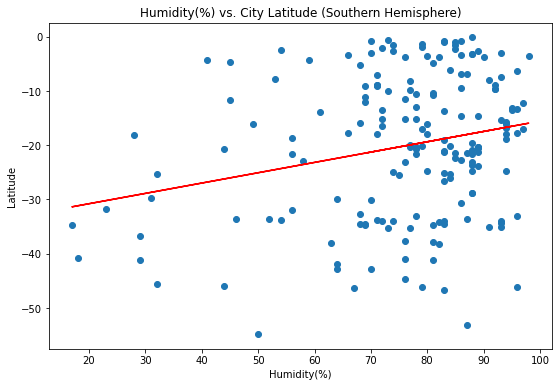

In [46]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Humidity"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.062221465358331285
y = 0.12x + 31.14


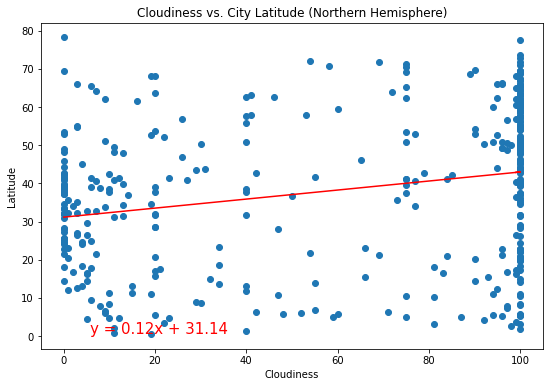

In [47]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.15216285741866395
y = 0.13x + -27.78


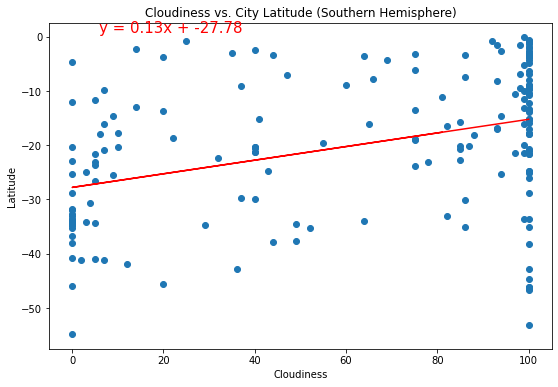

In [48]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010555638182653242
y = -0.24x + 38.94


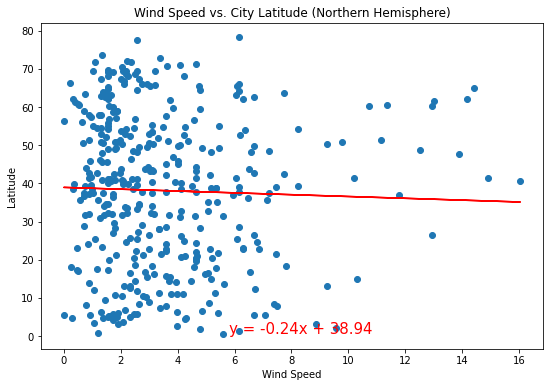

In [49]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

The r-value is: 0.03786328676208968
y = -1.25x + -16.06


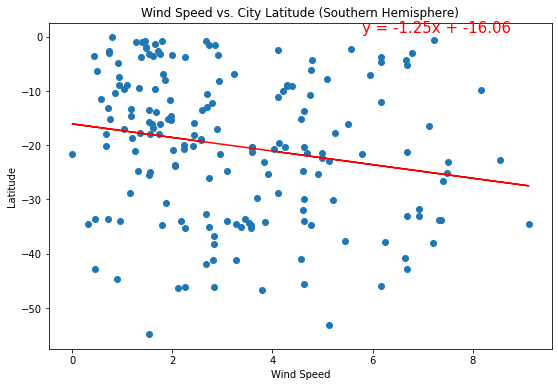

In [50]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE